<a href="https://colab.research.google.com/github/luisdiaz1997/Eigenfaces/blob/master/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import tensorflow as tf

In [0]:
images_files = glob.glob("drive/My Drive/Colab Notebooks/lfw/**/*jpg", recursive = True )

In [0]:
images = np.array( [cv2.imread(image, cv2.IMREAD_GRAYSCALE) for image in images_files], dtype=np.float64)

In [0]:

x = images.reshape(images.shape[0], -1).T
mean = np.mean(x, axis = 1)
x_train = x-mean.reshape(-1, 1)


In [0]:
x_train.shape

(62500, 1054)

In [0]:
def tf_matmul(x, y):
    x = tf.constant(x)
    y = tf.constant(y)
    cov = tf.matmul(x, y)
    return cov.eval(session=tf.Session())

In [0]:
C = tf_matmul(x_train.T, x_train)

In [0]:
def plot_portraits(images):
    plt.figure(figsize=(2.2 * 7, 2.2 * 7))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(49):
        plt.subplot(7, 7, i + 1)
        plt.imshow(images[: , i].reshape((250,250)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

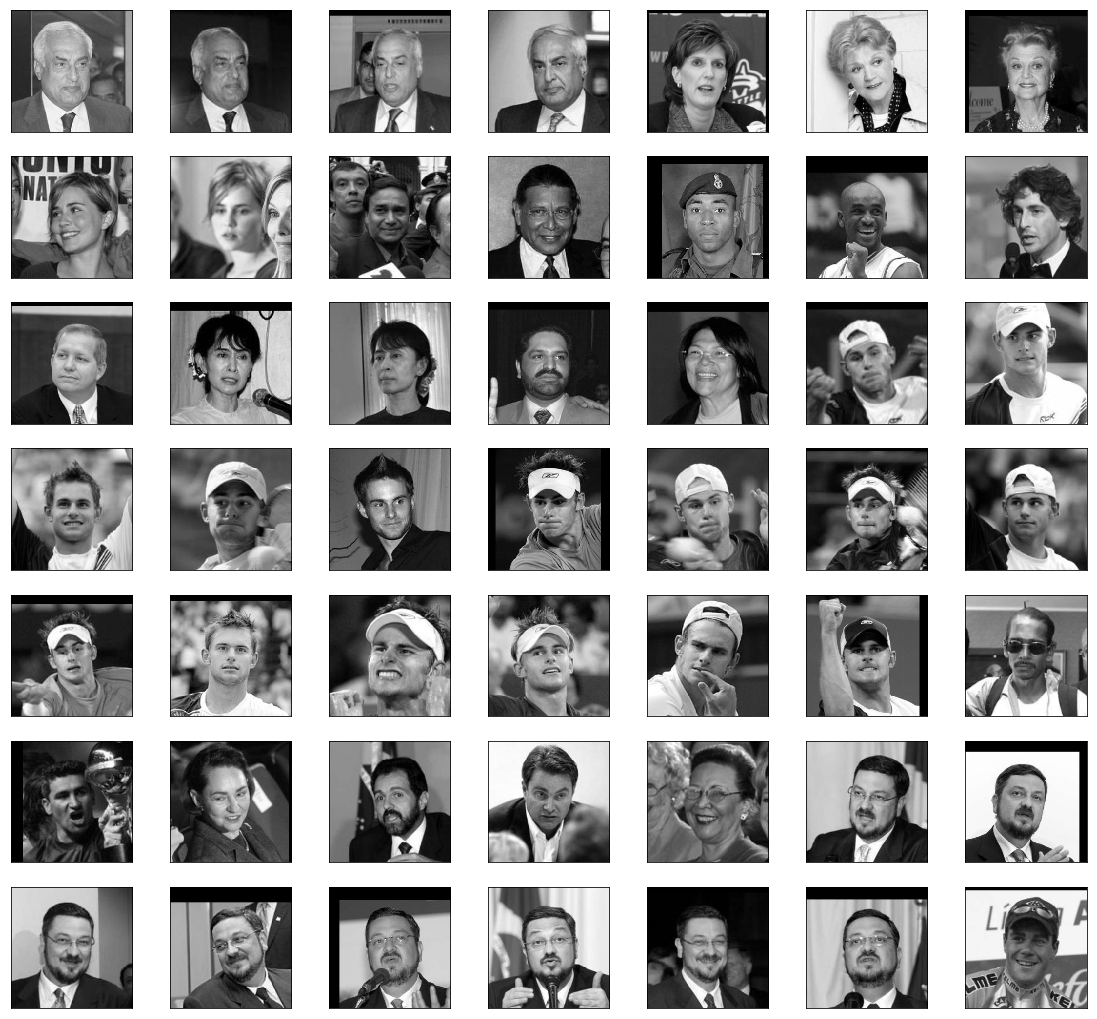

In [0]:
plot_portraits(x)

In [0]:
[U, S, V] = np.linalg.svd(C)

In [0]:
variance = S/np.sum(S)
sum = 0
k = int(len(variance)/10)
for i in range(k):
  sum += variance[i]
  
sum


0.8735363993248868

In [0]:
w = U[:, :k]

In [0]:
u = tf_matmul( x_train, w)
u.shape

(62500, 105)

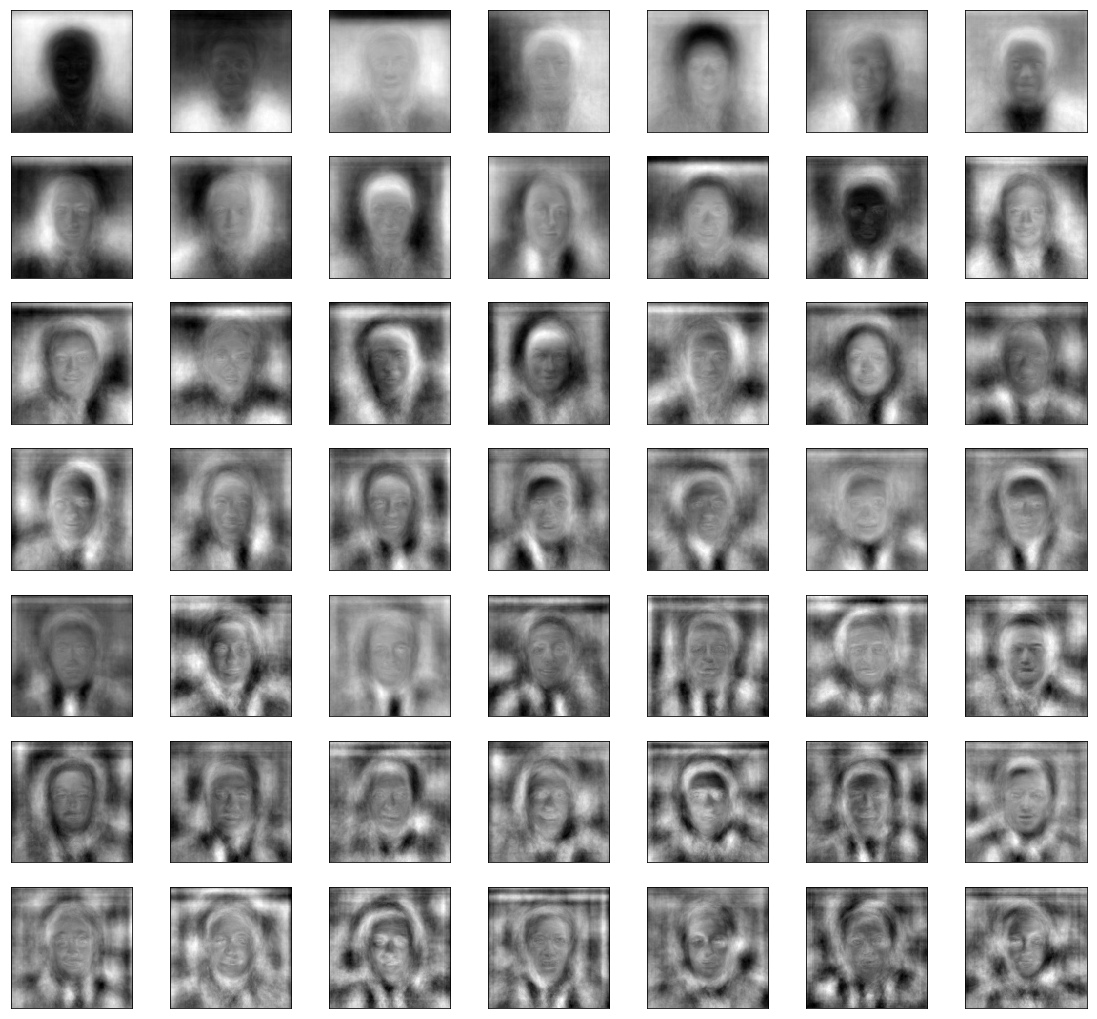

In [0]:
plot_portraits(u/np.linalg.norm(u, axis = 0))

In [0]:
x_rec = tf_matmul(u, w.T)

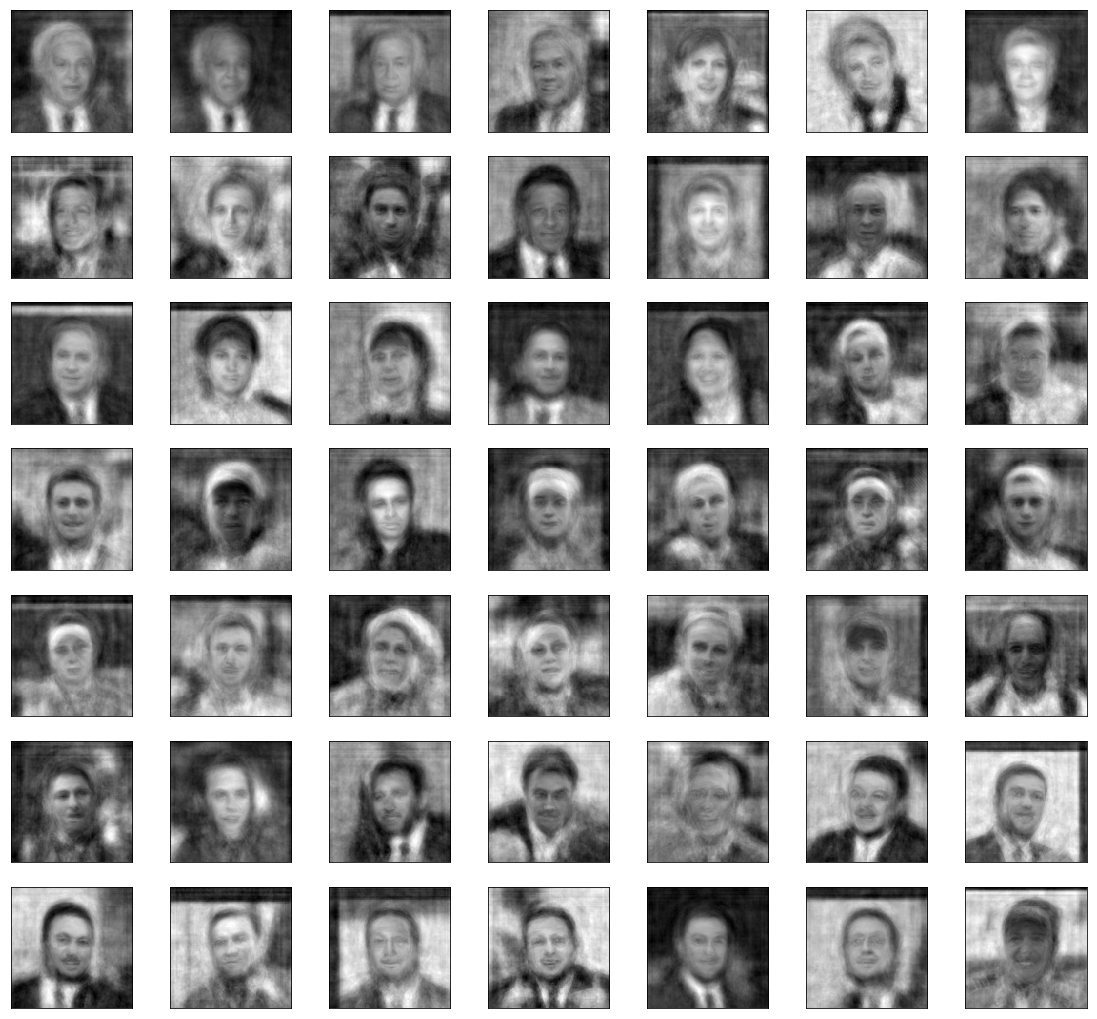

In [0]:
plot_portraits(x_rec + mean.reshape(-1, 1))